## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=101)
data.head()

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 101 non-null    int64  
 1   Name               101 non-null    object 
 2   Gender             101 non-null    object 
 3   Field              101 non-null    object 
 4   Occupation         101 non-null    object 
 5   Age                101 non-null    int64  
 6   Openness           101 non-null    float64
 7   Extraversion       101 non-null    float64
 8   Agreeableness      101 non-null    float64
 9   Conscientiousness  101 non-null    float64
 10  Neuroticism        101 non-null    float64
 11  Interface_1        101 non-null    float64
 12  Interface_2        101 non-null    float64
 13  Interface_3        101 non-null    float64
 14  Interface_4        101 non-null    float64
 15  Interface_5        101 non-null    float64
 16  Interface_6        101 non

In [5]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         6.930693
Interface_19         6.930693
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [6]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [7]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [8]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [9]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [10]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000
mean,51.019802,22.188119,4.019802,3.287129,3.524752,2.648515,3.351485,6.871287,6.061386,6.043564,...,7.415842,6.514851,6.490099,7.118812,7.978218,6.102128,6.161702,9.564356,10.80198,10.435644
std,29.334274,5.942580,0.851237,1.253688,0.881409,1.439695,1.231959,1.686199,1.920571,1.970960,...,1.918631,2.269863,2.303237,1.725034,1.760375,2.030467,2.054220,4.517557,5.28965,5.378505
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,26.000000,20.000000,3.000000,2.000000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,6.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.00000,7.000000
50%,51.000000,21.000000,4.000000,3.000000,4.000000,3.000000,3.000000,7.000000,6.000000,6.000000,...,8.000000,7.000000,7.000000,7.000000,8.000000,6.102128,6.161702,10.000000,11.00000,10.000000
75%,76.000000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,16.00000,16.000000
max,102.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.00000,19.000000


In [11]:
data.value_counts('Test_Score')

Test_Score
Gold      31
Blue      26
Orange    25
Green     19
dtype: int64

# Statistical analysis

In [12]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Id,1.000000,-0.070000,0.020000,-0.110000,0.050000,-0.170000,0.060000,-0.040000,-0.110000,-0.080000,0.030000,-0.180000,-0.070000,-0.020000,0.060000,-0.010000,0.180000,-0.060000,-0.020000,0.040000,-0.200000,-0.200000,-0.070000,0.080000,-0.010000,0.030000,0.080000,0.030000,-0.150000
Age,-0.070000,1.000000,-0.000000,0.200000,0.200000,0.210000,0.020000,0.090000,0.070000,0.040000,0.170000,0.070000,0.130000,-0.020000,0.050000,0.060000,-0.090000,-0.010000,0.030000,0.040000,0.170000,0.180000,0.070000,-0.060000,0.180000,0.050000,0.010000,0.060000,0.040000
Openness,0.020000,-0.000000,1.000000,0.290000,0.050000,0.190000,0.040000,0.040000,0.030000,0.150000,0.140000,0.240000,0.110000,0.100000,0.090000,-0.020000,0.190000,0.040000,0.100000,0.220000,0.010000,-0.060000,0.140000,0.080000,0.100000,-0.020000,0.150000,-0.210000,-0.100000
Extraversion,-0.110000,0.200000,0.290000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.180000,0.110000,0.230000,0.100000,0.150000,0.050000,0.070000,0.080000,-0.010000,0.090000,0.060000,0.020000,0.070000,0.010000,0.180000,-0.070000,0.170000,-0.070000,-0.030000,-0.060000,0.000000
Agreeableness,0.050000,0.200000,0.050000,0.150000,1.000000,0.060000,0.140000,0.060000,0.070000,0.080000,0.050000,0.070000,-0.050000,-0.130000,-0.060000,0.070000,-0.210000,0.000000,0.050000,-0.080000,-0.030000,-0.010000,0.060000,-0.080000,0.060000,-0.020000,-0.040000,-0.140000,-0.070000
Conscientiousness,-0.170000,0.210000,0.190000,0.120000,0.060000,1.000000,0.040000,0.160000,0.180000,0.070000,0.010000,0.090000,0.160000,0.040000,0.070000,0.190000,-0.010000,0.180000,0.020000,0.160000,0.190000,0.110000,0.120000,0.140000,0.000000,0.020000,0.000000,-0.010000,0.080000
Neuroticism,0.060000,0.020000,0.040000,-0.050000,0.140000,0.040000,1.000000,0.250000,0.130000,0.260000,0.180000,0.170000,0.050000,0.040000,0.000000,0.070000,0.250000,0.120000,0.200000,0.120000,-0.060000,-0.040000,0.010000,-0.010000,0.090000,0.080000,-0.250000,-0.220000,-0.010000
Interface_1,-0.040000,0.090000,0.040000,0.010000,0.060000,0.160000,0.250000,1.000000,0.680000,0.750000,0.390000,0.490000,0.210000,0.130000,0.110000,0.150000,0.210000,0.530000,0.400000,0.230000,0.160000,0.280000,0.250000,0.400000,0.260000,0.230000,-0.350000,-0.310000,-0.280000
Interface_2,-0.110000,0.070000,0.030000,0.180000,0.070000,0.180000,0.130000,0.680000,1.000000,0.730000,0.390000,0.430000,0.310000,0.300000,0.270000,0.310000,0.210000,0.350000,0.320000,0.210000,0.240000,0.320000,0.240000,0.310000,0.340000,0.170000,-0.410000,-0.350000,-0.190000
Interface_3,-0.080000,0.040000,0.150000,0.110000,0.080000,0.070000,0.260000,0.750000,0.730000,1.000000,0.270000,0.350000,0.310000,0.230000,0.140000,0.150000,0.260000,0.420000,0.360000,0.190000,0.140000,0.250000,0.230000,0.340000,0.290000,0.160000,-0.300000,-0.270000,-0.290000


# get dynamic the highest and lowest interfaces along all the personalities

In [13]:
data_1= data[data.columns[11:31]]
data_1

,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score
0,6.0,6.0,5.0,5.0,6.0,4.0,7.0,6.0,6.0,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000,Green
1,8.0,7.0,7.0,6.0,8.0,9.0,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000,Blue
2,9.0,8.5,7.0,6.0,9.0,8.0,9.0,6.0,5.0,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000,Green
3,6.0,5.5,5.0,6.0,6.5,5.0,7.0,5.0,4.0,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000,Blue
4,5.0,3.0,4.0,4.0,7.0,7.0,8.0,5.0,8.0,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.102128,6.161702,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.0,5.0,6.0,8.0,7.0,4.0,8.0,6.0,2.0,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000,Gold
97,6.0,5.0,6.0,8.0,7.0,4.0,8.0,6.0,2.0,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000,Green
98,6.0,5.0,4.0,7.0,8.0,8.0,8.0,7.5,8.0,9.0,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.000000,7.000000,Gold
99,4.0,4.0,3.0,5.0,5.0,2.0,7.0,1.0,2.0,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.000000,4.000000,Gold


In [14]:
import heapq

In [15]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [16]:
def get_index(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [17]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
Orange_values


(9, 16, 10, 12, 8, 7, 11, 17)

In [18]:
selected_green = [*Green_values]

selected_blue = [*Blue_values]

selected_gold = [*Gold_values]

selected_orange = [*Orange_values]

In [19]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [20]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]


In [21]:
selected_interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\2108893319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_interfaces['Test_Score']=data_1.iloc[:,-1]


In [22]:
Interfaces=selected_interfaces

In [23]:
Interfaces['Interface_2'] = selected_interfaces['Interface_2'].apply(lambda x: 1 if x >= 6 else 0) 
Interfaces['Interface_6'] = selected_interfaces['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_8'] = selected_interfaces['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_9'] = selected_interfaces['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_12'] = selected_interfaces['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_14'] = selected_interfaces['Interface_14'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_18'] = selected_interfaces['Interface_18'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_7'] = selected_interfaces['Interface_7'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_10'] = selected_interfaces['Interface_10'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_11'] = selected_interfaces['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_13'] = selected_interfaces['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_16'] = selected_interfaces['Interface_16'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_17'] = selected_interfaces['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\996942898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_2'] = selected_interfaces['Interface_2'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_14132\996942898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_6'] = selected_interfaces['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_14132\996942898.py:3: SettingWithCopyWarning: 
A value 

# Data is dataset that holds one and zeros 

In [24]:
Data=data

convert from ratings into 0 if smaller than 6 and else 1 

In [25]:
Data['Interface_2'] = data['Interface_2'].apply(lambda x: 1 if x >= 6 else 0) 
Data['Interface_6'] = data['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_8'] = data['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_9'] = data['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_12'] = data['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_14'] = data['Interface_14'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_18'] = data['Interface_18'].apply(lambda x: 1 if x >= 6 else 0)   


In [26]:
Data['Interface_7'] = data['Interface_7'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_10'] = data['Interface_10'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_11'] = data['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_13'] = data['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_16'] = data['Interface_16'].apply(lambda x: 1 if x >= 6 else 0)   
Data['Interface_17'] = data['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  

In [27]:
New = Data.drop(['Name','Occupation','Gender','Field','Top_1','Top_2','Top_3','Id','Interface_1','Interface_3','Interface_4','Interface_5','Interface_15','Interface_19'],axis = 1)
New

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,1,1,1,1,1,1,1,1,1,Green
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,0,1,1,1,1,1,1,1,1,Blue
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,0,1,1,1,1,0,1,1,1,Green
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,0,0,1,1,1,1,1,1,1,Blue
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,1,1,1,0,1,1,1,1,1,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,Gold
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,Green
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,1,1,1,0,1,1,1,1,1,Gold
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,Gold


In [28]:
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



# Machine learning using selected interfaces 

In [29]:
from sklearn.metrics import f1_score

In [30]:

y=np.full([len(data['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(data['Test_Score'])):
    if data['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif data['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif data['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


y1

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0,

In [31]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [32]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
accuracy_score(y_test, y_pred_lgr)*100


28.57142857142857

In [33]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


38.095238095238095

In [34]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

33.33333333333333

In [35]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

28.57142857142857

In [36]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

23.809523809523807

In [37]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


42.857142857142854

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

23.809523809523807

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


28.57142857142857
28.57142857142857
38.095238095238095


In [40]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 33.33%


# GReen

In [41]:
New1 = Data.drop(['Name','Occupation','Gender','Field','Top_1','Top_2','Top_3','Id','Interface_1','Interface_3','Interface_4','Interface_5','Interface_15','Interface_19'],axis = 1)


In [42]:
Green_data= New1
Green_data

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,1,1,1,1,1,1,1,1,1,Green
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,0,1,1,1,1,1,1,1,1,Blue
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,0,1,1,1,1,0,1,1,1,Green
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,0,0,1,1,1,1,1,1,1,Blue
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,1,1,1,0,1,1,1,1,1,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,Gold
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,Green
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,1,1,1,0,1,1,1,1,1,Gold
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,Gold


In [43]:
New1['Test_Score'].unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [44]:
dummy_df = pd.get_dummies(Green_data, columns=['Test_Score'])

In [45]:
Green_data=dummy_df
Green_data

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,...,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,...,1,1,1,1,1,1,0,0,1,0
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,...,1,1,1,1,1,1,1,0,0,0
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,...,1,1,0,1,1,1,0,0,1,0
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,...,0,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,...,1,1,0,1,1,1,0,1,0,0
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,...,1,1,0,1,1,1,0,0,1,0
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,...,0,1,1,1,1,1,0,1,0,0
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [46]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)
Green_data

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Green
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,1,1,1,1,1,1,1,1,1,1
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,0,1,1,1,1,0,1,1,1,1
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,0
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,1
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,1,1,1,0,1,1,1,1,1,0
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [47]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[6:19]].values
x

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [49]:
lgr= LogisticRegression(solver="liblinear")
model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
accuracy_score(y_test, y_pred_lgr)*100


# f1_score(y_test, y_pred_lgr) 

80.95238095238095

In [50]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 


76.19047619047619


In [51]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100


80.95238095238095

In [52]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

80.95238095238095

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


86.25
80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.00      0.00      0.00         4

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [54]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

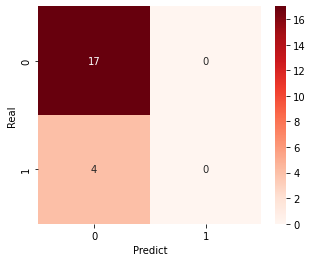

In [55]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [56]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


76.19047619047619

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100


28.57142857142857

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)

71.42857142857143
66.66666666666666
76.19047619047619


In [59]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 80.95%


In [60]:
Green_data.shape


(101, 20)

In [61]:
y = y1
y
x = Green_data[Green_data.columns[6:19]].values
x
Y= y
X=x

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

In [62]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

13.750000000000002
9.523809523809524


# Blue 

In [63]:
Blue_data= dummy_df

In [64]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [65]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[6:19]].values
x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)


In [66]:
lgr= LogisticRegression(solver="liblinear")
model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
print(accuracy_score(y_test, y_pred_lgr)*100)


77.41935483870968


In [67]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

67.74193548387096

In [68]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

77.41935483870968

In [69]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

77.41935483870968

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

82.5
85.71428571428571
acc of KNN %  85.71428571428571
F-score               precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.40      0.57         5

    accuracy                           0.86        21
   macro avg       0.92      0.70      0.74        21
weighted avg       0.88      0.86      0.83        21



In [71]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

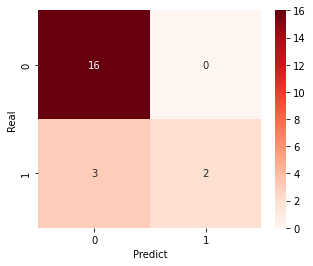

In [72]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [73]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


61.904761904761905

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

80.95238095238095

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)

57.14285714285714
76.19047619047619
57.14285714285714


In [76]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 76.19%


# GOld

In [77]:
Gold_data= dummy_df

In [78]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)
Gold_data

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Gold
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,0,1,1,1,1,0,1,1,1,0
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,1
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,0
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,1,1,1,0,1,1,1,1,1,1
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [79]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[6:19]].values
x

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

In [81]:
lgr= LogisticRegression(solver="liblinear")
model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
accuracy_score(y_test, y_pred_lgr)*100

58.06451612903226

In [82]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)

regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)

54.83870967741935
70.96774193548387
58.06451612903226


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

77.5
66.66666666666666
F-score               precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [84]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

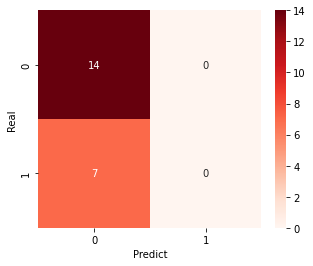

In [85]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [86]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


71.42857142857143

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

61.904761904761905

In [88]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)

52.38095238095239
71.42857142857143
71.42857142857143


In [89]:
model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 66.67%


# Orange

In [90]:
Orange_data= dummy_df

In [91]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)
Orange_data

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Orange
0,21,3.0,2.0,4.0,5.0,4.0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
1,21,4.0,5.0,3.0,2.0,1.0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,23,5.0,4.0,3.0,3.0,3.0,1,1,1,1,0,1,1,1,1,0,1,1,1,0
3,20,4.0,3.0,5.0,5.0,1.0,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,19,4.0,2.0,3.0,5.0,5.0,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,0
97,21,5.0,4.0,4.0,1.0,4.0,0,0,1,1,0,1,1,1,1,0,1,1,1,0
98,23,3.0,3.0,4.0,2.0,3.0,0,1,1,1,1,1,1,0,1,1,1,1,1,0
99,21,3.0,1.0,3.0,1.0,3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [92]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[6:19]].values

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)


In [94]:
lgr= LogisticRegression(solver="liblinear")
model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
accuracy_score(y_test, y_pred_lgr)*100

77.41935483870968

In [95]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

70.96774193548387

In [96]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

80.64516129032258

In [97]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

77.41935483870968

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
print(X.shape,x_train.shape,x_test.shape)

(101, 13) (80, 13) (21, 13)


In [99]:
knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [100]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

81.25
76.19047619047619
acc of KNN %  76.19047619047619
F-score               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [101]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

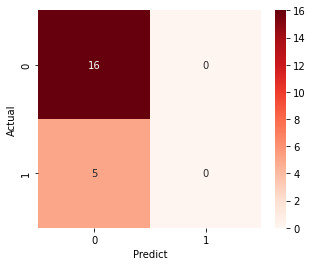

In [102]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [103]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


80.95238095238095

In [104]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

66.66666666666666

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)

71.42857142857143
66.66666666666666
76.19047619047619


In [106]:
model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 76.19%


# Vector
 all interfaces in one array 

In [107]:
y=New['Test_Score']
x=New[New.columns[6:19]].values
x

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [108]:
Y= y
X=x



In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)

lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)
accuracy_score(y_test, y_pred_lgr)*100

16.129032258064516

In [110]:
y = New['Test_Score']

x = Green_data[Green_data.columns[6:19]].values
x
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.19,1:0.26,2:0.31,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

47.61904761904761

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

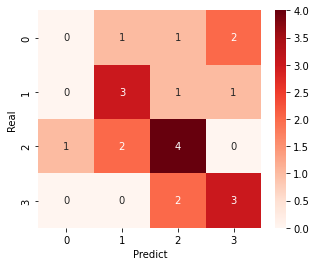

In [111]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [112]:
y = data['Test_Score']

x = Green_data[Green_data.columns[6:19]].values
x
Y= y
X=x

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)

svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svm= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svm)*100

35.483870967741936

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

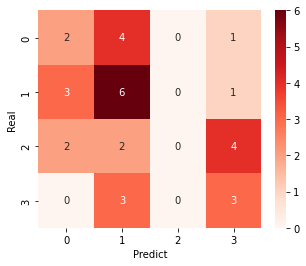

In [113]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [114]:
y = New['Test_Score']

x = Green_data[Green_data.columns[6:19]].values
x
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100


23.809523809523807

In [115]:
x = Green_data[Green_data.columns[6:19]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



56.25
47.61904761904761
F-score               precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.60      0.60      0.60         5
           2       0.60      0.43      0.50         7
           3       0.50      0.40      0.44         5

    accuracy                           0.48        21
   macro avg       0.50      0.48      0.48        21
weighted avg       0.52      0.48      0.48        21



In [116]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
26,1,3
86,1,1
2,0,0
55,1,1
75,3,0
94,2,0
16,1,2
73,1,1
54,0,1
96,2,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

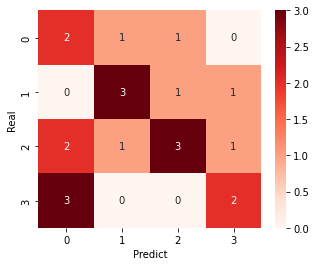

In [117]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

7.5


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


23.809523809523807

In [119]:
# from sklearn.metrics import confusion_matrix

# # m_c = confusion_matrix(y_test, y_pred_networks)
# plt.figure(figsize=(5, 4))
# sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [121]:
# from sklearn.naive_bayes import GaussianNB
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# gnb = GaussianNB()
# gnb.fit(x_train, y_train)
# y_pred_nav = gnb.predict(x_test)
# accuracy_score(y_test, y_pred_nav)*100

In [123]:
# from sklearn.metrics import confusion_matrix

# m_c = confusion_matrix(y_test, y_pred_nav)
# plt.figure(figsize=(5, 4))
# sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [125]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import ExtraTreeClassifier
# from xgboost import XGBClassifier


# ext =ExtraTreeClassifier()
# ext.fit(x_train, y_train)
# y_pred_ex = ext.predict(x_test)
# print (accuracy_score(y_test, y_pred_ex)*100)

# ada=AdaBoostClassifier()
# ada.fit(x_train, y_train)
# y_pred_ada= ada.predict(x_test)
# print (accuracy_score(y_test, y_pred_ada)*100)

# xbg= XGBClassifier()
# xbg.fit(x_train, y_train)
# y_pred_gb = xbg.predict(x_test)
# print (accuracy_score(y_test, y_pred_gb)*100)

In [127]:
# from sklearn.naive_bayes import MultinomialNB


# model = MultinomialNB()

# model.fit(x_train, y_train)
# predictions = model.predict(x_test)
# accuracy = accuracy_score(y_test, predictions) * 100
# print("The accuracy was %.2f%%" % accuracy)

# Cross tab 

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_13'], margins=True)


In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_7'], margins=True)

In [ ]:
pd.crosstab(index=New1['Interface_13'], columns=New1['Interface_7'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_17'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_11'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_16'], margins=True)

# Cross tab lowest

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_2'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_6'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_8'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_9'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_12'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_14'], margins=True)

In [ ]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_18'], margins=True)

# 6 Interfaces to KNN

In [132]:
Interfaces=New1

In [133]:
Interfaces.columns

Index(['Age', 'Openness', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Interface_2', 'Interface_6', 'Interface_7',
       'Interface_8', 'Interface_9', 'Interface_10', 'Interface_11',
       'Interface_12', 'Interface_13', 'Interface_14', 'Interface_16',
       'Interface_17', 'Interface_18', 'Test_Score'],
      dtype='object')

In [134]:
Interfaces= Interfaces.drop(['Interface_6', 'Interface_7','Interface_11','Interface_12','Interface_14', 'Interface_16','Interface_18'],axis = 1)

In [140]:

Interfaces.columns
Interfaces[Interfaces.columns[6:12]]

,Interface_2,Interface_8,Interface_9,Interface_10,Interface_13,Interface_17
0,1,1,1,1,1,1
1,1,0,0,1,1,1
2,1,1,0,1,1,1
3,0,0,0,0,1,1
4,0,0,1,1,1,1
...,...,...,...,...,...,...
96,0,1,0,1,1,1
97,0,1,0,1,1,1
98,0,1,1,1,1,1
99,0,0,0,1,1,1


In [142]:
x = Interfaces[Interfaces.columns[0:12]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


50.0
23.809523809523807
F-score               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.38      0.60      0.46         5
           2       0.14      0.14      0.14         7
           3       0.00      0.00      0.00         5

    accuracy                           0.24        21
   macro avg       0.25      0.25      0.23        21
weighted avg       0.23      0.24      0.22        21



In [ ]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# deep


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, Flatten
from keras.models import Sequential
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:


y=np.full([len(data['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(data['Test_Score'])):
    if data['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif data['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif data['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1 

In [ ]:

x = New.drop(['Test_Score'],axis = 1)

Y= y1
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(101, activation='relu'))
model.add(tf.keras.layers.Dense(4,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

loss,acc_T=model.evaluate(x_test, y_test)
print("loss", loss)
print("accuracy:" , acc_T)